In [ ]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles, JLD2
include("src/basic_CPHL_utils.jl")
include("src/CPHL_module.jl")

N_g = 20;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);
N_sites = 5
cphl = CPHL.CPHLSolver(N_sites, g_vals);

In [29]:
CPHL.SetUpHamiltonians(cphl);
OString_bare_vals = copy(cphl.OString_GS_vals)
ZZ_bare_vals = copy(cphl.ZZ_GS_vals)

cphl.OStringWeight = .5
CPHL.OptimizeCPDMRG(cphl);

In [ ]:
CPHL.LearnHarmonics(cphl)
@show cphl.flag_convegence

@save "DATA/ALPHAMat.jld2" ALPHAMat = copy(cphl.ALPHAMat)

Current error = 0.4684379654458593
Current error = 0.20923455884712597
Current error = 0.09226881458691645
Current error = 0.04932490758711735
Current error = 0.0354662857477756
Current error = 0.03166126445525889
Current error = 0.030732370964228248
Current error = 0.03052358864433503
Current error = 0.03041301216994572
Current error = 0.03020178255944723
cphl.flag_convegence = false


false

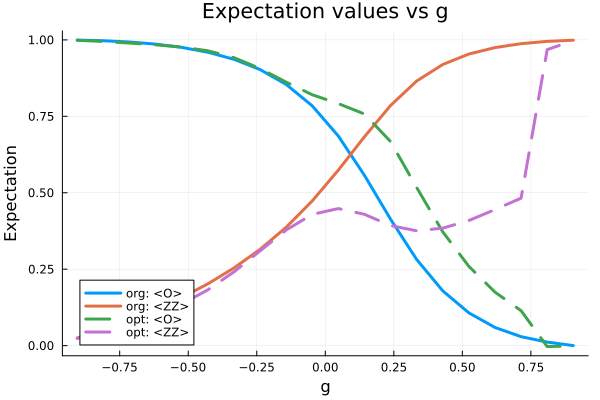

In [31]:
p = plot(cphl.g_vals, OString_bare_vals, label="org: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, ZZ_bare_vals / (cphl.N_sites - 1), label="org: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)

In [33]:
using Pkg
Pkg.add("JLD2")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed ScopedValues ───────── v1.3.0
   Installed HashArrayMappedTries ─ v0.2.0
   Installed JLD2 ───────────────── v0.5.15
   Installed FileIO ─────────────── v1.17.0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [033835bb] + JLD2 v0.5.15
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [5789e2e9] + FileIO v1.17.0
  [076d061b] + HashArrayMappedTries v0.2.0
  [033835bb] + JLD2 v0.5.15
  [7e506255] + ScopedValues v1.3.0
Precompiling project...
   1113.4 ms  ✓ HashArrayMappedTries
    240.2 ms  ✓ ScopedValues
   2618.0 ms  ✓ FileIO
   1792.1 ms  ✓ FileIO → HTTPExt
   2794.1 ms  ✓ Plots → FileIOExt
  16704.4 ms  ✓ JLD2
   1005.8 ms  ✓ JLD2 → UnPackExt
  7 dependencies successfully precompiled in 22 seconds. 337 already precompiled.
